# ICE_3_Numbers_Harshavardhan_Aila(11636549)

In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [ ]:
listen_count = pd.read_csv('/content/train_triplets.txt.zip', header=None, delimiter='\t')
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [ ]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

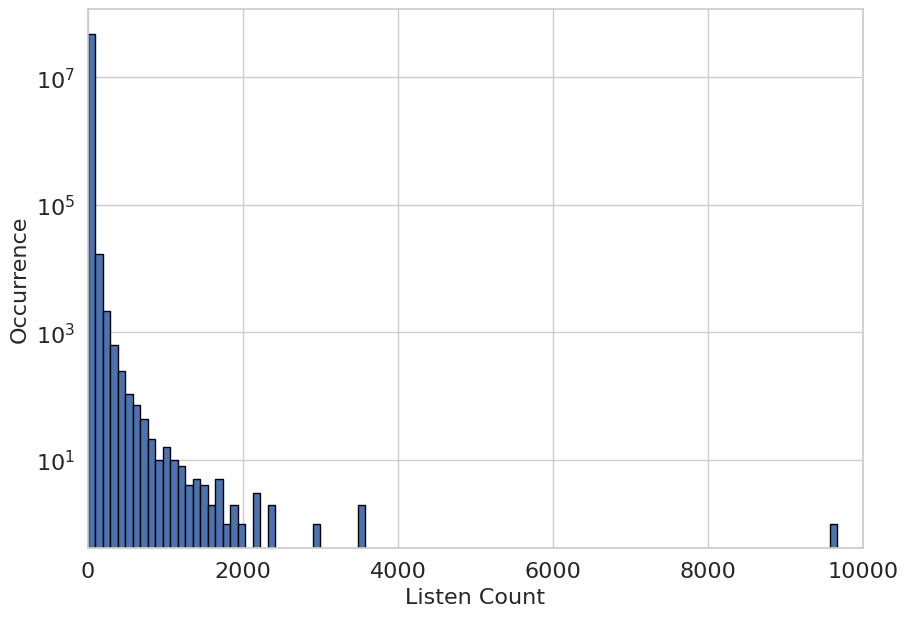

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [9]:
# write your code here
#Loading the athletes data
Athle_data=pd.read_excel(r'E:/UNT/2nd Sem-Summer_2023/Feature Eng/Task-3/archive/Athletes.xlsx')

## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [10]:
# write you code here
Athle_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


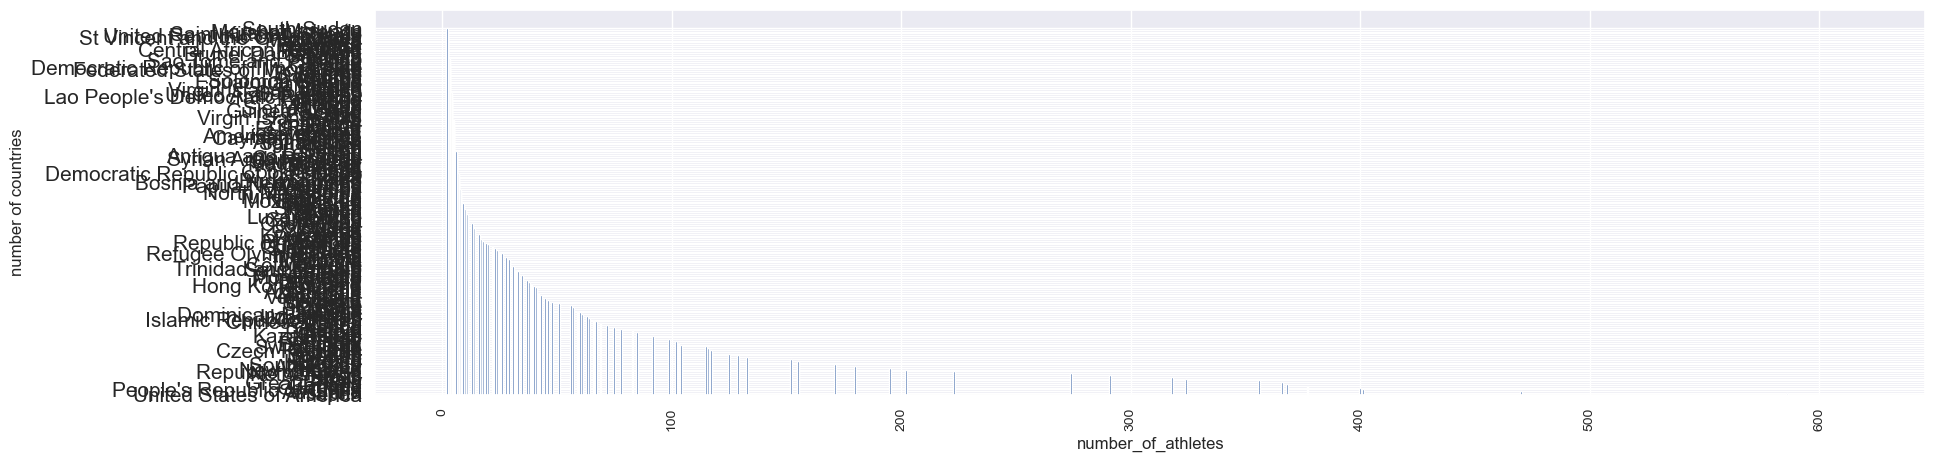

In [11]:
y = Athle_data.NOC.value_counts().values
x = Athle_data.NOC.value_counts().index
plt.figure(figsize=(20,5))
plt.bar(y,x)
plt.xlabel("number_of_athletes")
plt.ylabel("number of countries")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [12]:
athletes_per_country = Athle_data.groupby('NOC')['Name'].count().reset_index(name='Athletes_Count')


In [13]:
athletes_per_country['Athletes_Count']

0       5
1       8
2      41
3       5
4       2
       ..
201     3
202     4
203     3
204    29
205     5
Name: Athletes_Count, Length: 206, dtype: int64

## **(Tutorial) Quantizing data**

In [14]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([47, 18, 82, 16,  0,  1, 16, 68, 91, 35, 18, 41, 96, 15,  3, 39, 90,
        7, 36, 43])

In [15]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([4, 1, 8, 1, 0, 0, 1, 6, 9, 3, 1, 4, 9, 1, 0, 3, 9, 0, 3, 4],
      dtype=int32)

In [16]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [17]:
import json

In [18]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [19]:
biz_df = load_json_df('yelp_academic_dataset_business.json')
biz_df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'yelp_academic_dataset_business.json'

In [ ]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [ ]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

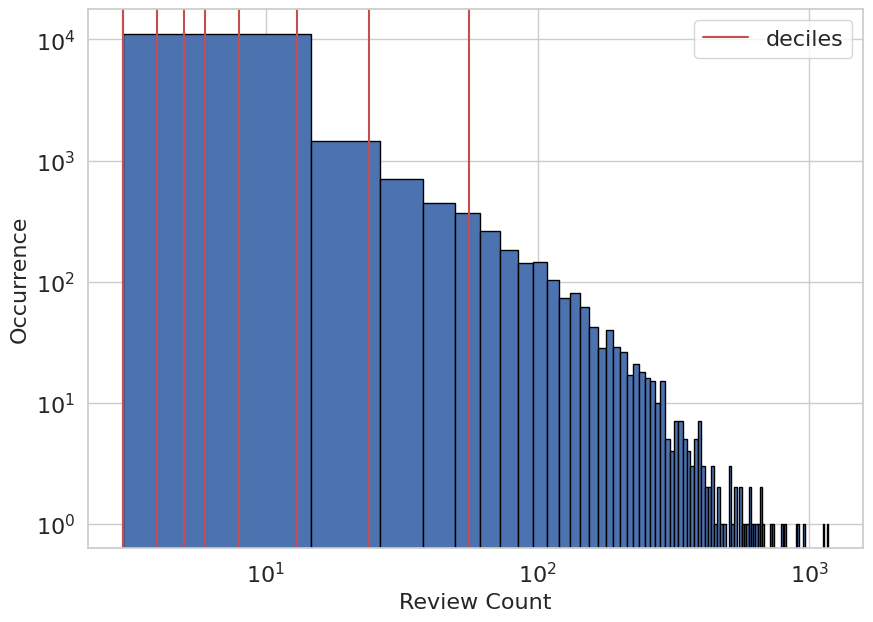

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

In [20]:
# write the code here
Quantiles = athletes_per_country['Athletes_Count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
Quantiles 

0.1      3.0
0.2      4.0
0.3      5.0
0.4      7.0
0.5     10.0
0.6     23.0
0.7     39.5
0.8     67.0
0.9    142.5
Name: Athletes_Count, dtype: float64

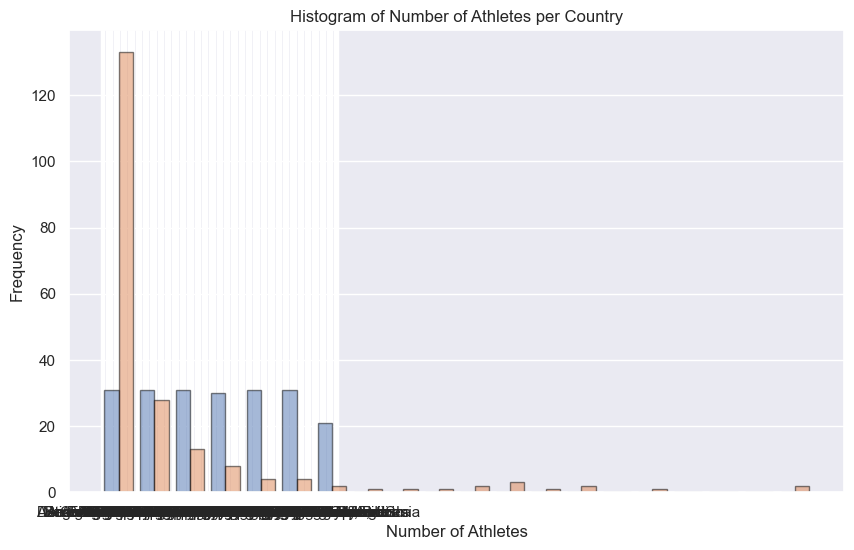

In [21]:
# Visualizing histograms for number of athletes
plt.figure(figsize=(10, 6))
plt.hist(athletes_per_country, bins=20, alpha=0.5, edgecolor='black')
plt.xlabel('Number of Athletes')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Athletes per Country')
plt.show()

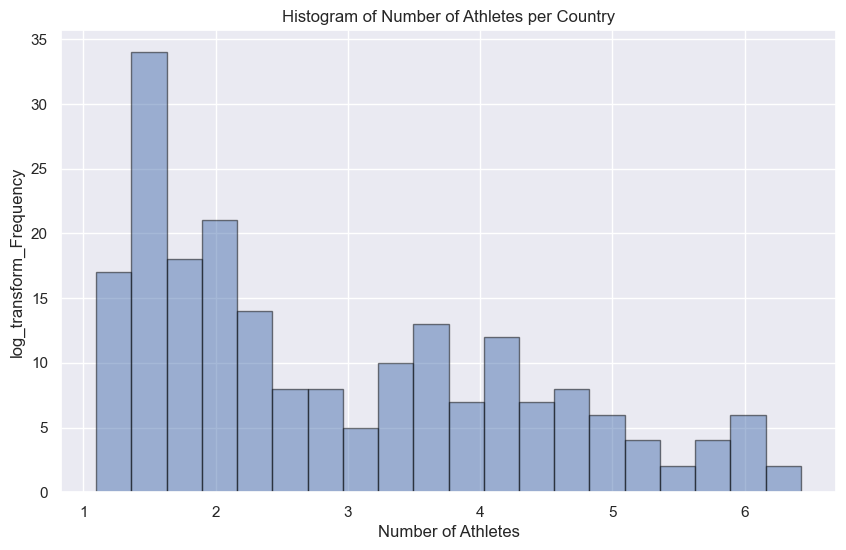

In [22]:
# Applying log transformation for number of athletes
logtransform_athletes = np.log1p(athletes_per_country['Athletes_Count'])
# Visualizing the histograms after log transformation
plt.figure(figsize=(10, 6))
plt.hist(logtransform_athletes, bins=20, alpha=0.5, edgecolor='black')
plt.xlabel('Number of Athletes')
plt.ylabel('log_transform_Frequency')
plt.title('Histogram of Number of Athletes per Country')
plt.show()

## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: Type your answer here

---


## **(Tutorial) Box-Cox transform**

In [27]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

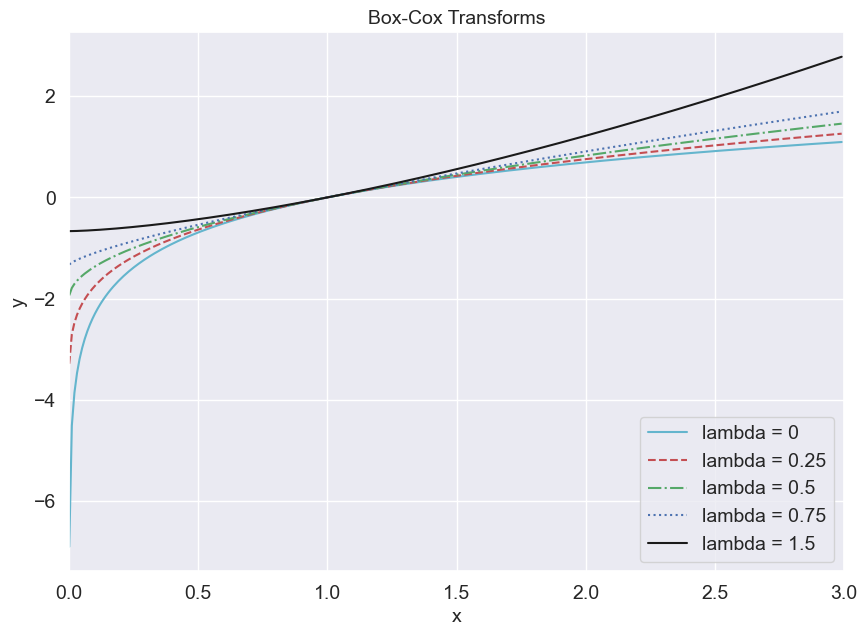

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [29]:
from scipy import stats

In [30]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

NameError: name 'biz_df' is not defined

Text(0, 0.5, 'Occurrence')

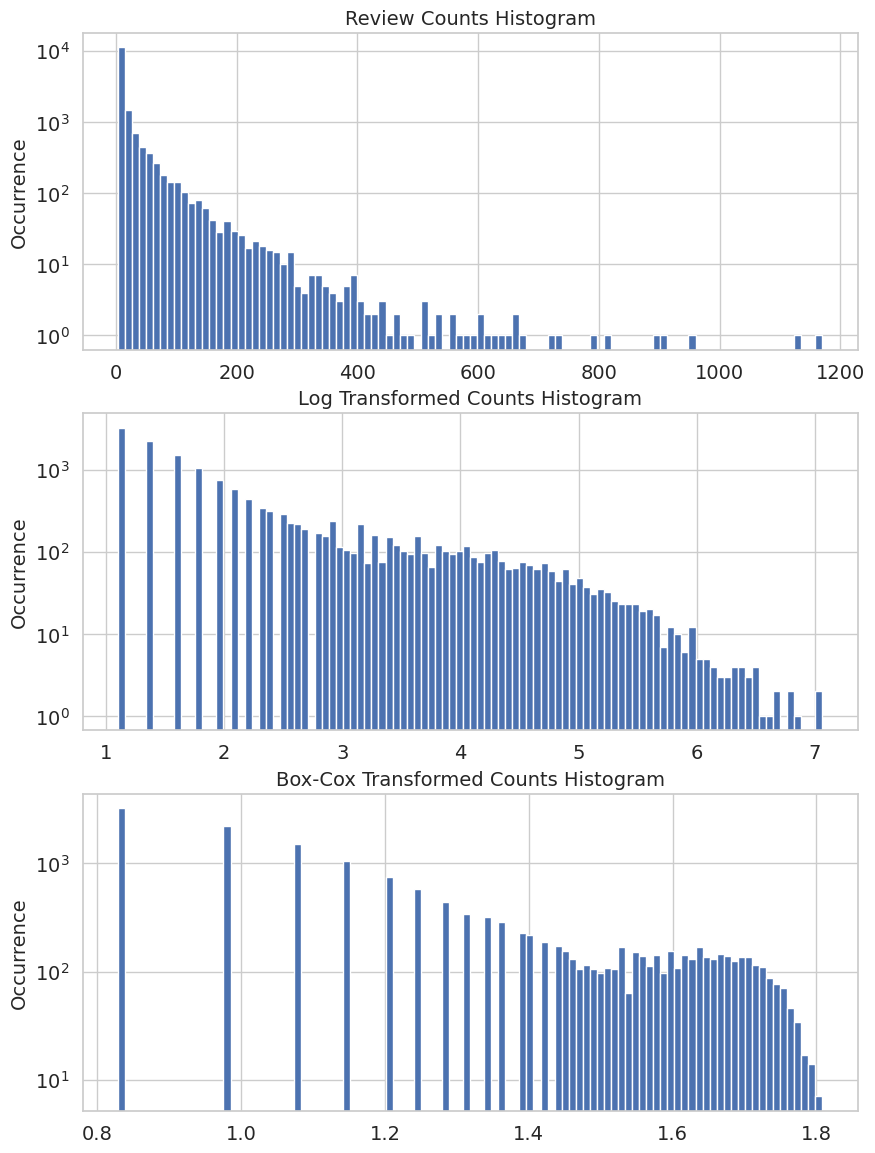

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

In [31]:
# write your code here
rc_log = stats.boxcox(athletes_per_country['Athletes_Count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(athletes_per_country['Athletes_Count'])
athletes_per_country['rc_bc'] = rc_bc
athletes_per_country['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

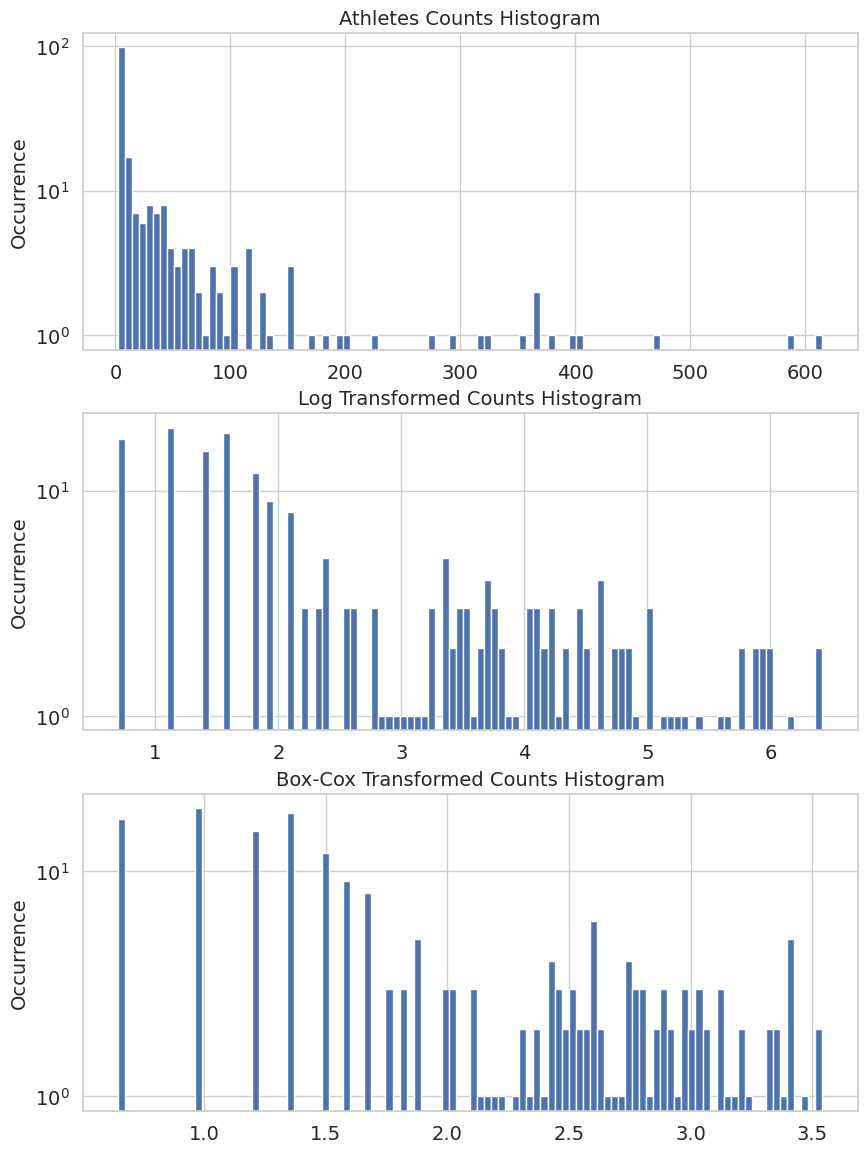

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
athletes_per_country['Athletes_Count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Athletes Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
athletes_per_country['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
athletes_per_country['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:** 
we have square root transform method like log and box cox transformation methods. As we seen these methods to generate new feature using existing values . These are all feature engineering methods to handle the numerical features effectively. 

Square root transform method used when the data is concentrated more on right skewed distribution it means that major data distributed on lower side . Once we apply this method we can make data to symmetric . This way we can generalize variance for the numerical features and also reduces the impact of outliers.

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [32]:
import sklearn.preprocessing as preproc

In [36]:
news_df = pd.read_csv(r'E:\UNT\2nd Sem-Summer_2023\Feature Eng\Task-3\OnlineNewsPopularity\OnlineNewsPopularity\OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [37]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [38]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [39]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 44.249999999999986, 'L2-normalized word count')

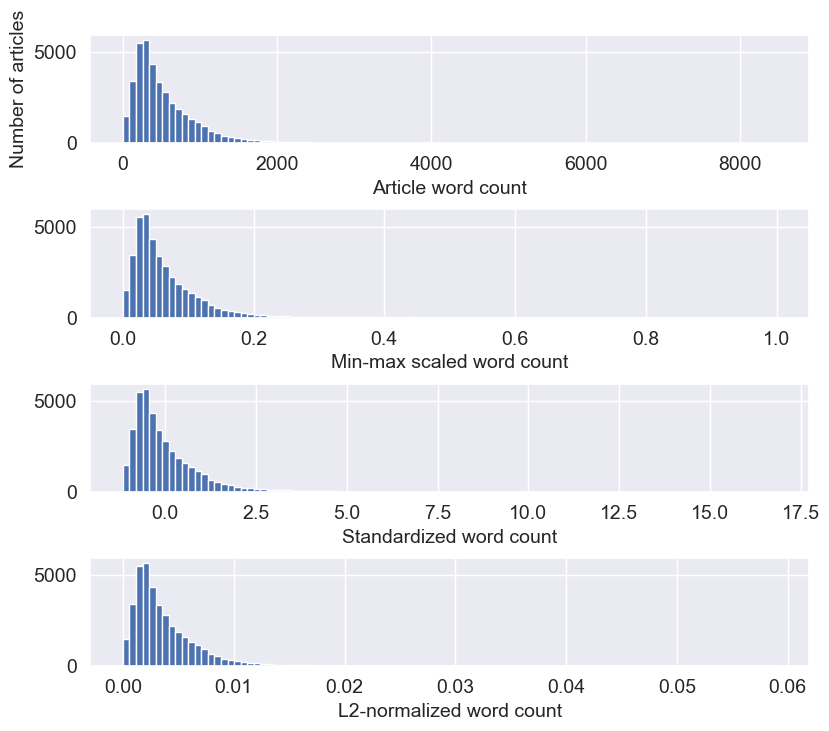

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

In [41]:
# write your code here
# Min-max scaling
athletes_per_country['minmax'] = preproc.minmax_scale(athletes_per_country[['Athletes_Count']])
athletes_per_country['minmax'].values

array([0.00489396, 0.00978793, 0.06362153, 0.00489396, 0.        ,
       0.02936378, 0.00652529, 0.2903752 , 0.0228385 , 0.00163132,
       0.7634584 , 0.1141925 , 0.06362153, 0.0228385 , 0.04730832,
       0.00652529, 0.00815661, 0.16639478, 0.20065253, 0.00163132,
       0.00815661, 0.        , 0.00163132, 0.00489396, 0.00815661,
       0.01794454, 0.47145188, 0.        , 0.06362153, 0.00815661,
       0.00652529, 0.00163132, 0.01468189, 0.59706362, 0.00652529,
       0.00489396, 0.        , 0.00163132, 0.08809135, 0.10603589,
       0.10114192, 0.00163132, 0.00163132, 0.00652529, 0.01794454,
       0.08972268, 0.10929853, 0.01957586, 0.18760196, 0.04404568,
       0.00163132, 0.00815661, 0.16476346, 0.00326264, 0.        ,
       0.09624796, 0.07177814, 0.2137031 , 0.00489396, 0.00163132,
       0.01794454, 0.05057096, 0.00326264, 0.06525285, 0.00163132,
       0.04241436, 0.07014682, 0.61174551, 0.00489396, 0.00163132,
       0.05383361, 0.64926591, 0.01957586, 0.59380098, 0.11908

In [42]:
# Standardization
athletes_per_country['standardized'] = preproc.StandardScaler().fit_transform(athletes_per_country[['Athletes_Count']])
athletes_per_country['standardized'].values

array([-0.48070881, -0.45116351, -0.12616515, -0.48070881, -0.51025412,
       -0.33298229, -0.47086038,  1.24276734, -0.37237603, -0.50040568,
        4.09881354,  0.17913634, -0.12616515, -0.37237603, -0.2246495 ,
       -0.47086038, -0.46101194,  0.49428627,  0.70110341, -0.50040568,
       -0.46101194, -0.51025412, -0.50040568, -0.48070881, -0.46101194,
       -0.40192133,  2.33594364, -0.51025412, -0.12616515, -0.46101194,
       -0.47086038, -0.50040568, -0.4216182 ,  3.09427315, -0.47086038,
       -0.48070881, -0.51025412, -0.50040568,  0.02156138,  0.12989417,
        0.10034886, -0.50040568, -0.50040568, -0.47086038, -0.40192133,
        0.03140982,  0.14959104, -0.3920729 ,  0.62231593, -0.24434637,
       -0.50040568, -0.46101194,  0.48443783, -0.49055725, -0.51025412,
        0.07080356, -0.07692297,  0.77989089, -0.48070881, -0.50040568,
       -0.40192133, -0.20495263, -0.49055725, -0.11631671, -0.50040568,
       -0.2541948 , -0.08677141,  3.18290907, -0.48070881, -0.50

In [43]:
# L2-normalization
athletes_per_country['l2_normalized'] = preproc.normalize(athletes_per_country[['Athletes_Count']], axis=0)
athletes_per_country['l2_normalized'].values

array([0.00303148, 0.00485037, 0.02485814, 0.00303148, 0.00121259,
       0.01212592, 0.00363778, 0.10913331, 0.00970074, 0.00181889,
       0.28495919, 0.04365332, 0.02485814, 0.00970074, 0.01879518,
       0.00363778, 0.00424407, 0.0630548 , 0.07578702, 0.00181889,
       0.00424407, 0.00121259, 0.00181889, 0.00303148, 0.00424407,
       0.00788185, 0.17643218, 0.00121259, 0.02485814, 0.00424407,
       0.00363778, 0.00181889, 0.00666926, 0.22311699, 0.00363778,
       0.00303148, 0.00121259, 0.00181889, 0.03395258, 0.04062184,
       0.03880295, 0.00181889, 0.00181889, 0.00363778, 0.00788185,
       0.03455888, 0.04183443, 0.00848815, 0.07093665, 0.01758259,
       0.00181889, 0.00424407, 0.0624485 , 0.00242518, 0.00121259,
       0.03698407, 0.02788962, 0.08063739, 0.00303148, 0.00181889,
       0.00788185, 0.02000777, 0.00242518, 0.02546444, 0.00181889,
       0.01697629, 0.02728333, 0.22857365, 0.00303148, 0.00181889,
       0.02122037, 0.24251846, 0.00848815, 0.22190439, 0.04547

Text(0.5, 44.249999999999986, 'L2-normalized athletes count')

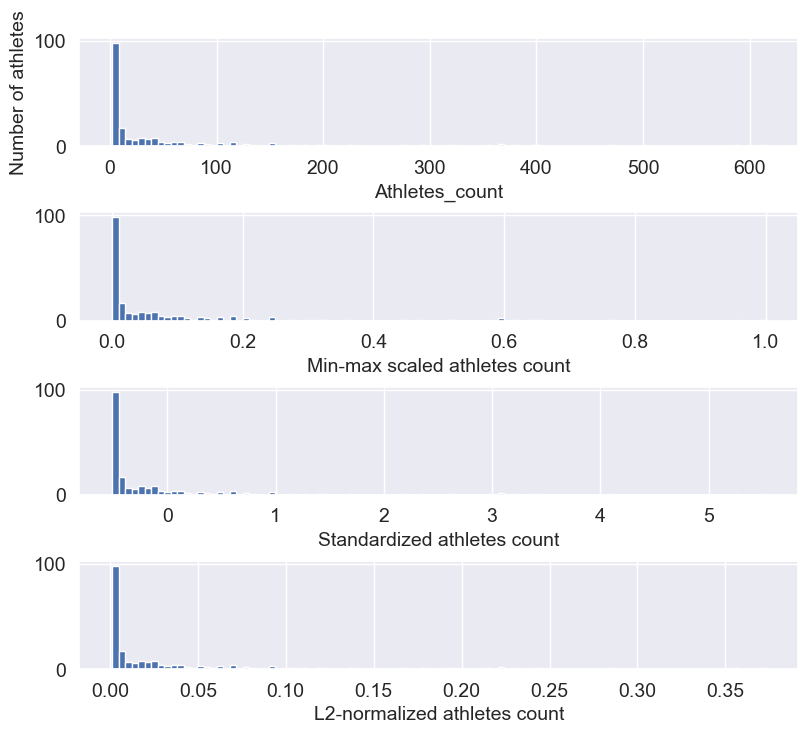

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

athletes_per_country['Athletes_Count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Athletes_count', fontsize=14)
ax1.set_ylabel('Number of athletes', fontsize=14)

athletes_per_country['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled athletes count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

athletes_per_country['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized athletes count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

athletes_per_country['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized athletes count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: 
The main difference among the all four histograms  spread of data distribution. In the first histogram we can see the actual distribution of athletes in each country and it falls in the range of 0 to 300 . In the min-max scaled histogram data falls in the range of 0 to 1 and most of the data points 0 to 0.2 . Data distribution of histogram for orginal and min max contains the same when compared to remaining histograms. These two have the same nunmber of histograms. In the standardize histograms data falls in the range of -1 to 1 . Most of the data points have the negative values in the standardize histogram. So data distribution is different when compared to remaining plots.In the l2 normalized histogram most of the data points from 0 to 0.05. some of the data points from 0.05 to 0.1.
Similarities: Most of the shapes of histograms are same except standardize histogram . In each histogram minimum value is 0 and distribution starts from 0 . Most of the Data points lies in the mean . Variance is small for all scaled histograms .


---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** 
Feature scaling histograms: The main aim of feature scaling to reduce variance of the data points . Normalizing the all numerical values within the center so that we can use these scaled features to machine learning algorithms effectively. min max scaling and l2 normalized histograms ranges from 0 to 1 while standardized histogram ranges -1 to 1 . In each scaling method minimum value is 0 and maximum value is 1 except standardization scaling.


---


## Example of interaction features in prediction

In [45]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [ ]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [ ]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [ ]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [ ]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [ ]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113156994


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [52]:
# write your code here
dry_bean=pd.read_excel(r'E:\UNT\2nd Sem-Summer_2023\Feature Eng\Task-3\DryBeanDataset\DryBeanDataset\Dry_Bean_Dataset.xlsx')

In [53]:
dry_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [54]:
dry_bean.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [55]:
dry_bean.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [56]:
features=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [57]:
# Converting class feature to numerical using label encoder
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()
dry_bean['Class'] = Lencoder.fit_transform(dry_bean['Class'])

In [58]:
dry_bean.Class.value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [59]:
X = dry_bean[features]
y = dry_bean[['Class']]

X.shape

(13611, 16)

In [60]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [61]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [62]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.57668
R-squared score with pairwise features: -0.0353097644


**Comparison:** In the above scores generated using linear regression model for dry bean dataset . Initially we have converted Class column to numerical values after that I have seperated X features and y label. I got R-squared score for single features 0.57668 it means that 57% variances explained using these features. And next 43% of variance explained using pairwise features. When compared to both singleton features explained variance very well when compared to pairwise features.